# HW1
- Išsirinkti duomenų rinkinį, su kuriuo bus dirbama visą semestrą. Rekomenduoju, kad rinkinyje būtų daugiau, negu 5 dimensijos, ir pakankamai stebinių.

- Pabandykite suformuluoti klausimus, į kuriuos tikitės rasti atsakymus.

- Pabandykite pagaminti grafikus, kurie padėtų į juos atsakyti.

- Paruoškite skaidres, kur paaiškintumėt duomenis, klausimus, problemas, rezultatus.

In [1]:
import pandas as pd
names=['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address', 'Price_Tomans', 'Price_USD']
rinkinys = pd.read_csv("rinkinys.csv", names=names, header=0)

In [2]:
#House Price (Tehran, Iran)
rinkinys.shape

(3469, 8)

In [3]:
rinkinys.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price_Tomans,Price_USD
0,63,1,Yra,Yra,Yra,Shahran,1850000000,61666.67
1,60,1,Yra,Yra,Yra,Shahran,1850000000,61666.67
2,79,2,Yra,Yra,Yra,Pardis,550000000,18333.33
3,95,2,Yra,Yra,Yra,Shahrake Qods,902500000,30083.33
4,123,2,Yra,Yra,Yra,Shahrake Gharb,7000000000,233333.33


In [4]:
rinkinys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3469 entries, 0 to 3468
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          3469 non-null   int64  
 1   Room          3469 non-null   int64  
 2   Parking       3469 non-null   object 
 3   Warehouse     3469 non-null   object 
 4   Elevator      3469 non-null   object 
 5   Address       3446 non-null   object 
 6   Price_Tomans  3469 non-null   int64  
 7   Price_USD     3469 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 216.9+ KB


In [5]:
#https://www.ritchieng.com/pandas-changing-datatype/
rinkinys['Room'] = rinkinys.Room.astype(float)
rinkinys['Price_Tomans'] = rinkinys.Price_Tomans.astype(float)

In [6]:
rinkinys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3469 entries, 0 to 3468
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Area          3469 non-null   int64  
 1   Room          3469 non-null   float64
 2   Parking       3469 non-null   object 
 3   Warehouse     3469 non-null   object 
 4   Elevator      3469 non-null   object 
 5   Address       3446 non-null   object 
 6   Price_Tomans  3469 non-null   float64
 7   Price_USD     3469 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 216.9+ KB


In [7]:
pd.isnull(rinkinys).sum()

Area             0
Room             0
Parking          0
Warehouse        0
Elevator         0
Address         23
Price_Tomans     0
Price_USD        0
dtype: int64

In [8]:
nrinkinys = pd.DataFrame(rinkinys)
nrinkinys.dropna(inplace=True)

In [9]:
nrinkinys.shape

(3446, 8)

In [10]:
pd.isnull(nrinkinys).sum()

Area            0
Room            0
Parking         0
Warehouse       0
Elevator        0
Address         0
Price_Tomans    0
Price_USD       0
dtype: int64

# 1. Koks procentas regijonų turi parkavimo vietas automobiliams?

In [11]:
nrinkinys["Parking"].value_counts()

Yra     2927
Nera     519
Name: Parking, dtype: int64

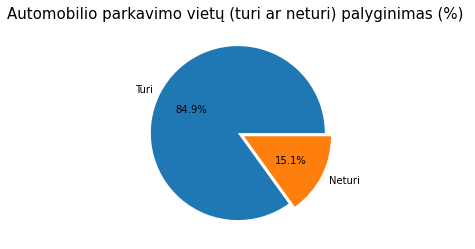

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_title("Automobilio parkavimo vietų (turi ar neturi) palyginimas (%) ", size =15)
explode=(0, 0.08)
ax.pie(x=nrinkinys["Parking"].value_counts().values, labels=['Turi', 'Neturi'], autopct='%.1f%%', explode=explode)
plt.show()

# 2. Kokių namų pagal kambarių kiekį yra daugiausia?

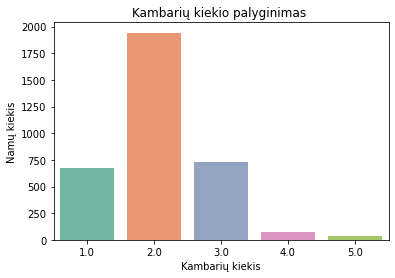

In [13]:
import seaborn as sns
dt_room = sns.countplot(x ='Room', data = nrinkinys, palette="Set2").set(title="Kambarių kiekio palyginimas ",
                                                                         xlabel="Kambarių kiekis", ylabel="Namų kiekis")


# 3. Kokie 10 regionų yra labiausiai siūlomi?

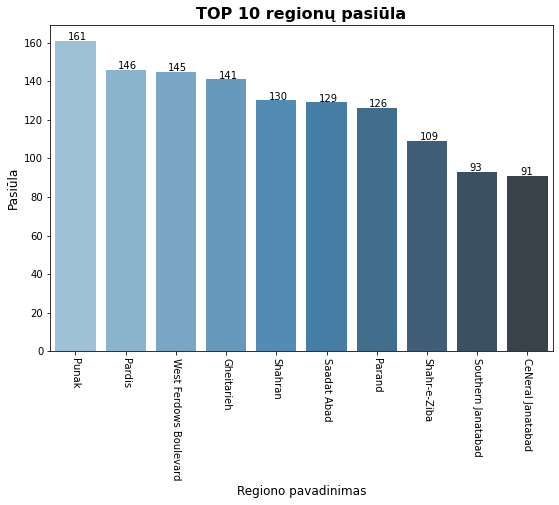

In [14]:
pirmos10_index=nrinkinys["Address"].value_counts().head(10).index
pirmos10_values=nrinkinys["Address"].value_counts().head(10).values

fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot(x=pirmos10_index, y=pirmos10_values, palette="Blues_d").set_title('TOP 10 regionų pasiūla', fontdict= { 'fontsize': 16,'fontweight':'bold'})

plt.xticks(rotation=270)
ax.set_ylabel('Pasiūla', size =12)
ax.set_xlabel('Regiono pavadinimas', size =12)
for p in ax.patches: 
    spacing = 0.2 if p.get_height() > 999  else 0.25
    ax.annotate(int(p.get_height()), (p.get_x()+ spacing, p.get_height()+0.4 ) );
    
